In [13]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [14]:
df = pd.read_csv('Validation error of 303 images')
df.head()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
0,0,-21.342337,7.255571,-12.179166,-11.754638,-40.546603,0.630457,44.836885,3.542933e+27,1444.444448,...,-18.420681,-4.093484,-5.884384,2.786789e+27,1549.247146,-6.740498,8.294310e+07,-10.951720,-4.119292,-8.522758
1,0,71.281323,47.354866,24.642092,7.933187,-11.568808,1.210692,-20.746425,1.518400e+27,1111.111112,...,-11.257083,-7.675284,-11.257083,2.600736e+27,1637.276292,-5.102205,8.384130e+07,-9.954772,-7.768208,-8.921640
2,0,49.445005,41.893095,1.069810,23.219300,2.059931,-10.994476,-44.000958,1.771467e+27,1111.111112,...,-7.675284,-11.257083,-16.629781,2.647368e+27,1576.589942,-5.947335,8.231523e+07,-7.833390,-10.019425,-9.312518
3,0,10.592068,2.691731,135.769129,-3.377801,133.236694,23.196906,266.972566,2.530667e+27,1555.555582,...,-2.302585,-9.466183,-2.302585,2.798717e+27,1597.426951,-5.428785,8.556276e+07,-5.370473,-11.662045,-8.449855
4,0,48.132735,8.099574,-21.175265,-15.909293,58.857113,-6.002540,73.098207,2.024533e+27,1555.555582,...,-2.302585,-7.675284,-4.093484,2.998997e+27,1681.548953,-13.108381,8.818298e+07,-3.657820,-7.214572,-7.085748


In [15]:
df.describe()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
count,302.0,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02,302.000000,...,302.000000,302.000000,302.000000,3.020000e+02,302.000000,302.000000,3.020000e+02,302.000000,302.000000,302.000000
mean,0.0,10.850588,10.971078,10.021442,7.549038,2.883348,6.827808,13.144229,2.721724e+27,1513.245042,...,-10.213380,-10.082917,-10.598838,2.801567e+27,1602.896224,-10.330488,8.356706e+07,-9.342578,-10.005277,-8.383711
std,0.0,31.872706,24.882952,31.588996,20.428831,33.613335,27.449490,87.899610,7.163552e+26,316.299655,...,5.069036,5.120023,5.010652,1.716897e+26,41.554657,4.401219,2.638274e+06,3.874282,4.732406,0.835359
min,0.0,-41.692990,-23.459551,-52.984138,-21.867940,-61.936446,-61.302475,-65.641566,1.518400e+27,1000.000000,...,-18.420681,-18.420681,-18.420681,2.213334e+27,1368.175030,-19.013425,7.282049e+07,-18.895618,-18.461312,-12.218388
25%,0.0,-14.522895,-9.871259,-6.489420,-10.089810,-15.248513,-8.429224,-41.953121,2.024533e+27,1222.222224,...,-14.838882,-14.838882,-14.838882,2.707531e+27,1576.646745,-13.967618,8.198238e+07,-11.913204,-14.032762,-8.813478
50%,0.0,4.673267,4.090292,0.556925,2.642596,-2.805296,0.274954,-24.912356,2.783733e+27,1555.555582,...,-9.466183,-9.466183,-11.257083,2.827606e+27,1606.739849,-10.434293,8.374162e+07,-8.584859,-9.071410,-8.399039
75%,0.0,28.002150,31.731054,13.758350,24.201285,10.954104,11.813540,41.190347,3.289867e+27,1777.777791,...,-5.884384,-5.884384,-5.884384,2.915626e+27,1631.168544,-6.471717,8.532096e+07,-6.188073,-5.764153,-7.858214
max,0.0,100.049230,66.298890,142.849898,52.665450,158.675194,141.653776,430.637860,3.796000e+27,2000.000000,...,-2.302585,-2.302585,-2.302585,3.171438e+27,1708.778858,-3.401441,9.040464e+07,-3.264871,-2.771636,-6.329058


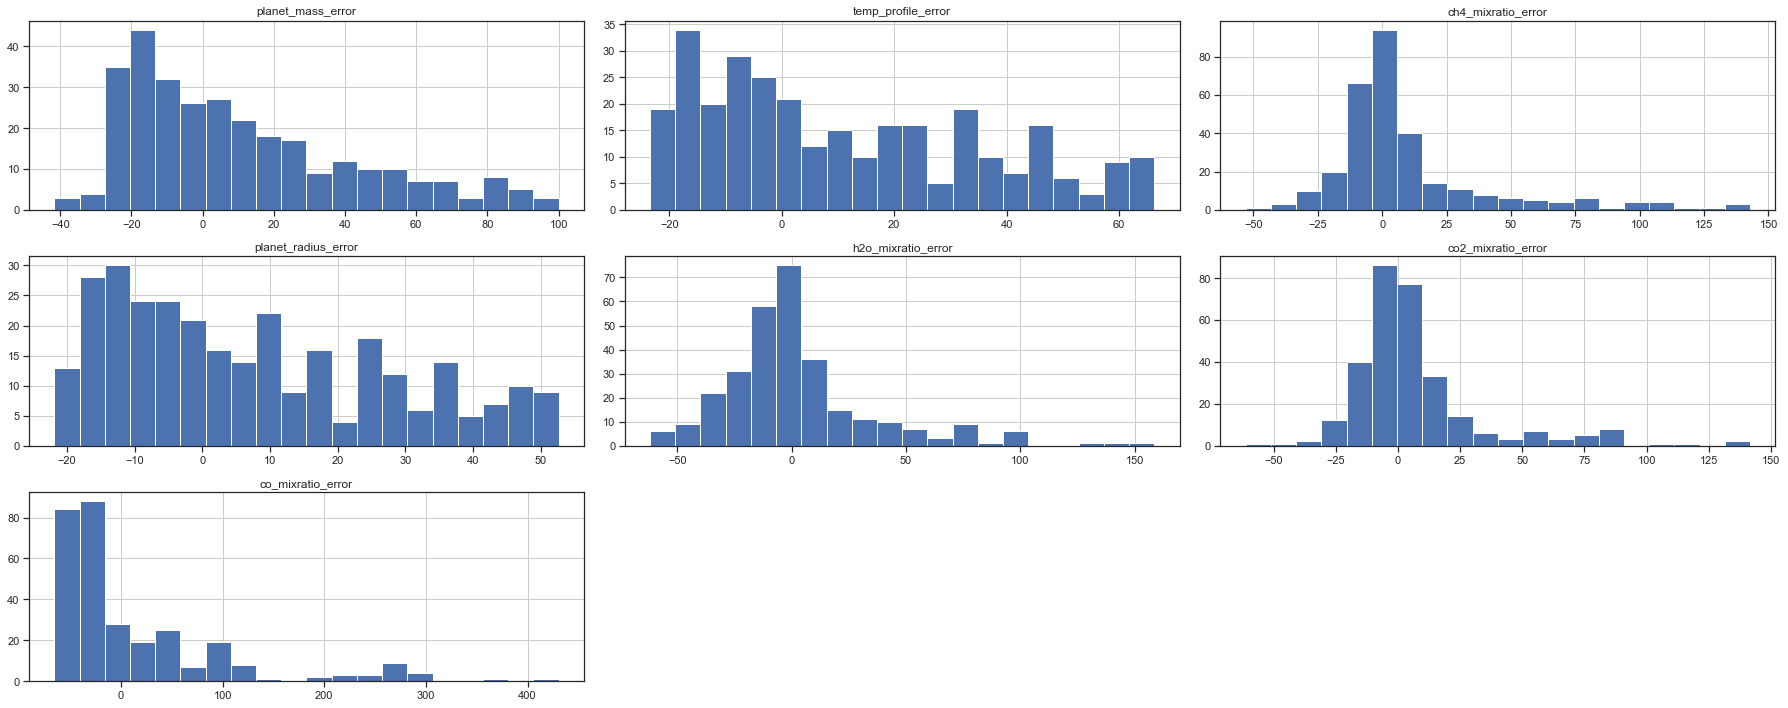

In [16]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param+'_error')
    plt.hist(df[param+'_error'], bins=20)
    plt.grid()
    plt.tight_layout()

# Grab the $n$ sigma errors

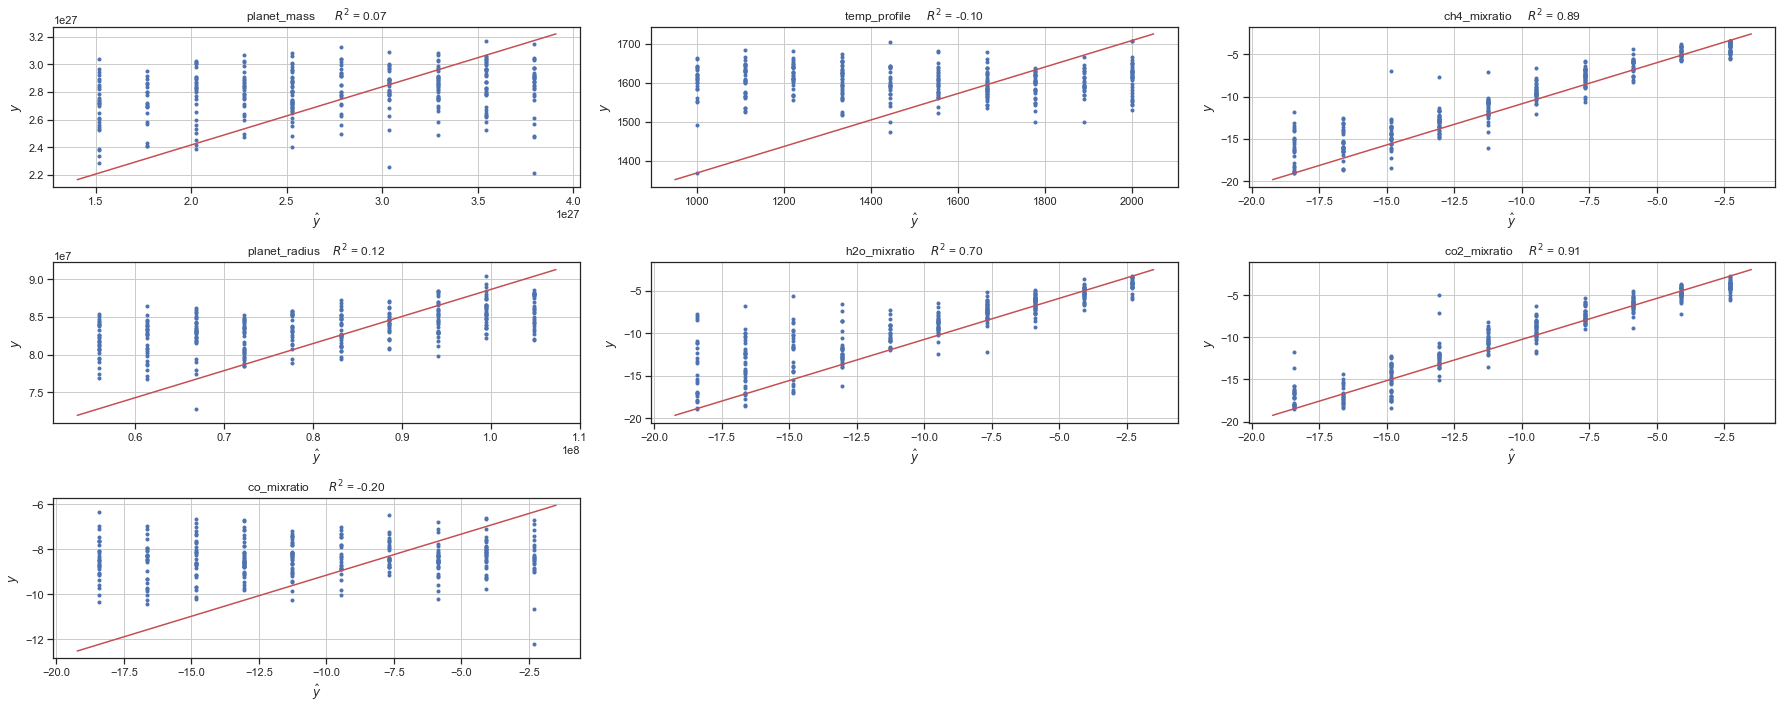

In [17]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    y_hat = df[param+'_real']
    y = df[param+'_inpainted']
    
    r2 = r2_score(y_hat, y)
    
    plt.subplot(3,3,i+1)
    plt.title(param +' \t $R^2$ = %.2f' % r2)
    plt.plot(y_hat, y, '.')
    plt.plot(plt.xlim(), plt.ylim(), ls="-", c='r')
    
    plt.xlabel(r"$\hat{y}$")
    plt.ylabel(r"$y$")
    plt.grid()
    plt.tight_layout()